## Setup Environment

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

sns.set_theme()

In [7]:
pd.set_option('display.max_columns', None)

## Import Data

In [2]:
df_raw = pd.read_excel('../data/Project_Interview_Advance_Data.xlsx')

In [3]:
df = df_raw.copy()

## Basic Exploration

### Basic Information

In [8]:
df.head()

,DefaultedAdvances,AdvanceAmount,CurrentBalance,LatefeesTotalCount,CreditAccounts,LastRepaymentAmount,OverdraftCount,OverdraftTotal,AverageMonthlySpend,BalanceAverage,BalanceMin,TotalAssets,AverageNumberOfTransactionsADay,TotalCash,LatefeesCount,Paycheck,TotalHistoryInDays,AverageMonthlyIncome,AverageMonthlyDiscretionarySpend,CheckingAccountCount,CreditAccountCount,SavingsAccountCount,OutstandingCreditDebtWherePayingInterest,AverageNumberOfTransactionsADayPrimaryChecking,SuspiciousTransactionCount,NegativeBalanceCount,Bal4100,Bal3100,Bal2100,Bal450,Bal350,Bal250,PaycheckModelUsed,NumberOfMatches,ErrorRate,IsNameBased,BalanceAbove100L30Count,AveragePotentialMonthlyIncome,HasEmpowerBanking
0,0,50,268.10,0,0,0.0,0,0,-5491.060000,345.11,-185.34,268.10,4.633333,268.10,0,2457.000000,61.179873,3969.461181,-1191.270000,1,0,1,0.0,4.633333,0,11,2,2,2,2,2,2,BruteForce,5.0,0.0,1.0,18,4398.506667,1
1,0,50,17.68,0,0,0.0,0,0,-1330.759925,378.01,0.08,17.72,1.647577,17.72,0,1706.900000,128.706924,1120.506790,-1503.200000,1,0,2,0.0,4.763780,0,0,7,13,13,7,13,13,BruteForce,7.0,0.0,0.0,28,3436.180000,0
2,0,50,0.79,0,0,0.0,0,0,-6446.753876,559.13,-276.61,273.99,4.080935,273.99,0,4630.347222,558.401660,6674.567286,-1546.523333,1,0,1,0.0,3.562950,0,20,4,5,5,4,5,5,BruteForce,5.0,0.0,1.0,16,6803.280000,1
3,0,50,-12.83,0,0,0.0,0,0,-1904.714237,124.86,-44.62,645.12,2.831579,645.12,0,1300.000000,285.776868,1787.241711,-940.616667,1,0,1,0.0,2.729825,0,15,6,6,6,7,7,7,BruteForce,3.0,0.0,0.0,15,0.000000,0
4,0,50,55.88,0,0,0.0,0,0,-5857.241057,420.26,42.50,55.88,8.926829,55.88,0,3633.073333,165.990591,5169.470216,-1893.433333,1,0,0,0.0,8.926829,0,0,3,3,3,30,30,30,BruteForce,3.0,0.0,0.0,24,7390.746667,1


In [10]:
df.shape

(11808, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   DefaultedAdvances                               11808 non-null  int64  
 1   AdvanceAmount                                   11808 non-null  int64  
 2   CurrentBalance                                  8748 non-null   float64
 3   LatefeesTotalCount                              11808 non-null  int64  
 4   CreditAccounts                                  11808 non-null  int64  
 5   LastRepaymentAmount                             11808 non-null  float64
 6   OverdraftCount                                  11808 non-null  int64  
 7   OverdraftTotal                                  11808 non-null  int64  
 8   AverageMonthlySpend                             11808 non-null  float64
 9   BalanceAverage                         

In [42]:
float_columns = [x for x in df.select_dtypes('float').columns]
int_columns = [x for x in df.select_dtypes('int').columns]
cat_columns = [x for x in df.columns if x not in float_columns+int_columns]

for col in float_columns:
    unique_values = df.loc[df[col].notna()][col].unique()
    # If the column only has 2 unique values that are not null it is likely binary
    if unique_values.shape[0]==2:
        float_columns.remove(col)
        int_columns.append(col)
        

In [43]:
cat_columns

['PaycheckModelUsed']

In [9]:
df.describe()

,DefaultedAdvances,AdvanceAmount,CurrentBalance,LatefeesTotalCount,CreditAccounts,LastRepaymentAmount,OverdraftCount,OverdraftTotal,AverageMonthlySpend,BalanceAverage,BalanceMin,TotalAssets,AverageNumberOfTransactionsADay,TotalCash,LatefeesCount,Paycheck,TotalHistoryInDays,AverageMonthlyIncome,AverageMonthlyDiscretionarySpend,CheckingAccountCount,CreditAccountCount,SavingsAccountCount,OutstandingCreditDebtWherePayingInterest,AverageNumberOfTransactionsADayPrimaryChecking,SuspiciousTransactionCount,NegativeBalanceCount,Bal4100,Bal3100,Bal2100,Bal450,Bal350,Bal250,NumberOfMatches,ErrorRate,IsNameBased,BalanceAbove100L30Count,AveragePotentialMonthlyIncome,HasEmpowerBanking
count,11808.000000,11808.0,8748.00000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.0,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11523.000000,11523.000000,11523.000000,11808.000000,11808.000000,11808.000000
mean,0.227896,50.0,133.14083,0.116192,0.088161,11.951476,1.801745,6.893123,-3741.363475,418.374617,-362.925129,13.841162,3.422773,-25.290139,0.021257,2292.253426,454.873754,3230.914687,-1009.142164,1.329861,0.088161,0.822324,167.126255,3.161636,0.0,8.180979,4.130081,4.497290,5.570884,5.660738,6.137873,7.487974,4.894038,0.176256,0.373080,10.149644,2759.371794,0.559282
std,0.419493,0.0,427.86386,1.049410,0.382476,142.960033,4.587174,20.092222,2648.075912,12496.390210,14185.307448,14304.688031,1.811319,14202.467825,0.199870,1385.029506,326.867983,2462.611175,925.198518,0.725125,0.382476,0.895829,1312.010301,1.523624,0.0,9.377771,5.929416,6.263746,7.271482,7.130663,7.516051,8.545467,2.127869,0.407044,0.483644,9.649303,2742.700299,0.496494
min,0.000000,50.0,-987.56000,0.000000,0.000000,0.000000,0.000000,0.000000,-79863.130600,-888820.570000,-890657.650000,-889828.940000,0.100987,-889828.940000,0.000000,501.785556,60.026809,0.000000,-18008.590000,1.000000,0.000000,0.000000,-550.380000,0.303867,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.0,0.06000,0.000000,0.000000,0.000000,0.000000,0.000000,-4604.766151,147.545000,-148.105000,0.080000,2.177242,0.070000,0.000000,1492.417639,175.783867,1811.585538,-1322.250833,1.000000,0.000000,0.000000,0.000000,2.105988,0.0,0.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,971.762500,0.000000
50%,0.000000,50.0,11.72500,0.000000,0.000000,0.000000,0.000000,0.000000,-3191.043870,286.385000,-50.095000,23.540000,3.118911,22.825000,0.000000,2015.943333,436.926054,2759.057571,-809.041667,1.000000,0.000000,1.000000,0.000000,2.939220,0.0,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,0.000000,0.000000,9.000000,2113.250000,1.000000
75%,0.000000,50.0,114.33250,0.000000,0.000000,0.000000,1.000000,5.000000,-2172.370028,535.687500,-5.877500,187.837500,4.285658,185.427500,0.000000,2708.365834,634.453579,4013.488490,-445.983333,1.000000,0.000000,1.000000,0.000000,3.956224,0.0,14.000000,4.000000,4.000000,5.000000,5.000000,6.000000,7.000000,5.000000,0.000000,1.000000,18.000000,3805.401666,1.000000
max,1.000000,50.0,19002.09000,34.000000,13.000000,8120.000000,80.000000,536.000000,-28.222487,878155.100000,13177.440000,118754.960000,18.046358,51372.350000,5.000000,31002.111110,2621.962694,80939.758600,12699.516670,16.000000,13.000000,15.000000,35924.260000,18.046358,0.0,63.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,11.000000,3.000000,1.000000,38.000000,75790.053330,1.000000


### Feature Overview

In [127]:
svc = []
contains_null = []
high_majority=[]
total_samples = df.shape[0]

for col in df.columns:
    s = df[col]
    unique_values = s.unique().shape[0]
    nulls = s.loc[s.isna()].shape[0]
    nulls_pct = nulls/total_samples
    max_pct = s.value_counts(normalize=True, dropna=False).sort_values(ascending=False).iloc[0]
    print(f"{col} | Unique Values: {unique_values} ({max_pct:.1%}) | Number of Nulls: {nulls} ({nulls_pct:.1%})")
    
    if unique_values == 1: svc.append(col)
    if nulls_pct > 0: contains_null.append(col)
    if max_pct > 0.75: high_majority.append(col)
    
print(f"\nThe following columns have only one value: {', '.join(svc)}")
print(f"The following columns have null values: {', '.join(contains_null)}")
print(f"The following columns have a large value majority: {', '.join(high_majority)}")

DefaultedAdvances | Unique Values: 2 (77.2%) | Number of Nulls: 0 (0.0%)
AdvanceAmount | Unique Values: 1 (100.0%) | Number of Nulls: 0 (0.0%)
CurrentBalance | Unique Values: 6342 (25.9%) | Number of Nulls: 3060 (25.9%)
LatefeesTotalCount | Unique Values: 25 (97.1%) | Number of Nulls: 0 (0.0%)
CreditAccounts | Unique Values: 9 (92.7%) | Number of Nulls: 0 (0.0%)
LastRepaymentAmount | Unique Values: 311 (95.4%) | Number of Nulls: 0 (0.0%)
OverdraftCount | Unique Values: 52 (67.9%) | Number of Nulls: 0 (0.0%)
OverdraftTotal | Unique Values: 160 (57.5%) | Number of Nulls: 0 (0.0%)
AverageMonthlySpend | Unique Values: 11803 (0.0%) | Number of Nulls: 0 (0.0%)
BalanceAverage | Unique Values: 11114 (0.0%) | Number of Nulls: 0 (0.0%)
BalanceMin | Unique Values: 8964 (4.7%) | Number of Nulls: 0 (0.0%)
TotalAssets | Unique Values: 9141 (2.1%) | Number of Nulls: 0 (0.0%)
AverageNumberOfTransactionsADay | Unique Values: 11181 (0.1%) | Number of Nulls: 0 (0.0%)
TotalCash | Unique Values: 9119 (2.1%

### Preliminary Null Exploration

In [126]:
target_var = 'DefaultedAdvances'
ct = 0
for col in contains_null:
    incidence_rate = df.loc[df[col].isna()][target_var].value_counts(normalize=True, dropna=False).loc[1]
    incidence_rate_xnull = df.loc[~df[col].isna()][target_var].value_counts(normalize=True, dropna=False).loc[0]
    print(f"{col} |  Incidence Rate amongst null: {incidence_rate:.1%} | Incidence Rate amongst non null: {incidence_rate_xnull:.1%}")
    ct+=df.loc[df[col].isna()][target_var].value_counts(normalize=False, dropna=False).loc[1]
print(f"Dropping all nulls would erase {ct} positive instances ({(ct/df.loc[df[target_var]==1].shape[0]):.1%})")

CurrentBalance |  Incidence Rate amongst null: 23.0% | Incidence Rate amongst non null: 77.3%
NumberOfMatches |  Incidence Rate amongst null: 28.4% | Incidence Rate amongst non null: 77.3%
ErrorRate |  Incidence Rate amongst null: 28.4% | Incidence Rate amongst non null: 77.3%
IsNameBased |  Incidence Rate amongst null: 28.4% | Incidence Rate amongst non null: 77.3%
Dropping all nulls would erase 947 positive instances (35.2%)


In [130]:
print(np.all(df.loc[df['ErrorRate'].isna()]['ErrorRate'].index == df.loc[df['IsNameBased'].isna()]['IsNameBased'].index))
print(np.all(df.loc[df['ErrorRate'].isna()]['ErrorRate'].index == df.loc[df['NumberOfMatches'].isna()]['NumberOfMatches'].index))

True
True


### Duplications

Are the two columns CreditAccounts and CreditAccountCount the same?


In [45]:
np.all(df['CreditAccounts']==df['CreditAccountCount'])

True

Are there any other pairs of columns that are duplicate of one another?

In [47]:
for c1 in df.columns:
    for c2 in df.columns:
        if np.all(df[c1]==df[c2]) and c1!=c2:
            print(c1, c2)

CreditAccounts CreditAccountCount
CreditAccountCount CreditAccounts


Are there any records in the data that are duplicates of each other?

In [49]:
df.shape==df.drop_duplicates().shape

True

How different are the 3 income columns: Paycheck, AverageMonthlyIncome, AveragePotentialMonthlyIncome?



In [119]:
def visualize_difference(cols=None):
    display(df[cols].describe())
    
    combinations = list(itertools.combinations(cols, 2))
    combinations_diff = {combo:abs(df[combo[0]]-df[combo[1]]) for combo in combinations}
    ncols = len(combinations)
    figsize=(ncols*6, 6)
    fig, ax = plt.subplots(figsize=figsize, ncols=ncols)
    fig2, ax2 = plt.subplots(figsize=figsize, ncols=ncols)
    fig3, ax3 = plt.subplots(figsize=figsize, ncols=ncols)

    for k, v in combinations_diff.items():
        if ncols == 1:
            sns.boxplot(data=v, showfliers=False, ax=ax)
            ax.set_title(f"Absolute difference between {k[0]} and {k[1]}")
            
            sns.stripplot(data=v,  ax=ax2)
            ax2.set_title(f"Absolute difference between {k[0]} and {k[1]}")
            
            s = v.to_frame().copy()
            s[target_var] = df[target_var]
            sns.boxplot(data=s, x=target_var, y=0, showfliers=False, ax=ax3)
            ax3.set_title(f"Absolute difference between {k[0]} and {k[1]}")
        else:
            
            sns.boxplot(data=v, showfliers=False, ax=ax[combinations.index(k)])
            ax[combinations.index(k)].set_title(f"Absolute difference between {k[0]} and {k[1]}")
            
            sns.stripplot(data=v,  ax=ax2[combinations.index(k)])
            ax2[combinations.index(k)].set_title(f"Absolute difference between {k[0]} and {k[1]}")
            
            s = v.to_frame().copy()
            s[target_var] = df[target_var]
            sns.boxplot(data=s, x=target_var, y=0, showfliers=False, ax=ax3[combinations.index(k)])
            ax3[combinations.index(k)].set_title(f"Absolute difference between {k[0]} and {k[1]}")
        
    fig.tight_layout()
    fig2.tight_layout()
    fig3.tight_layout()

,Paycheck,AverageMonthlyIncome,AveragePotentialMonthlyIncome
count,11808.000000,11808.000000,11808.000000
mean,2292.253426,3230.914687,2759.371794
std,1385.029506,2462.611175,2742.700299
min,501.785556,0.000000,0.000000
25%,1492.417639,1811.585538,971.762500
50%,2015.943333,2759.057571,2113.250000
75%,2708.365834,4013.488490,3805.401666
max,31002.111110,80939.758600,75790.053330


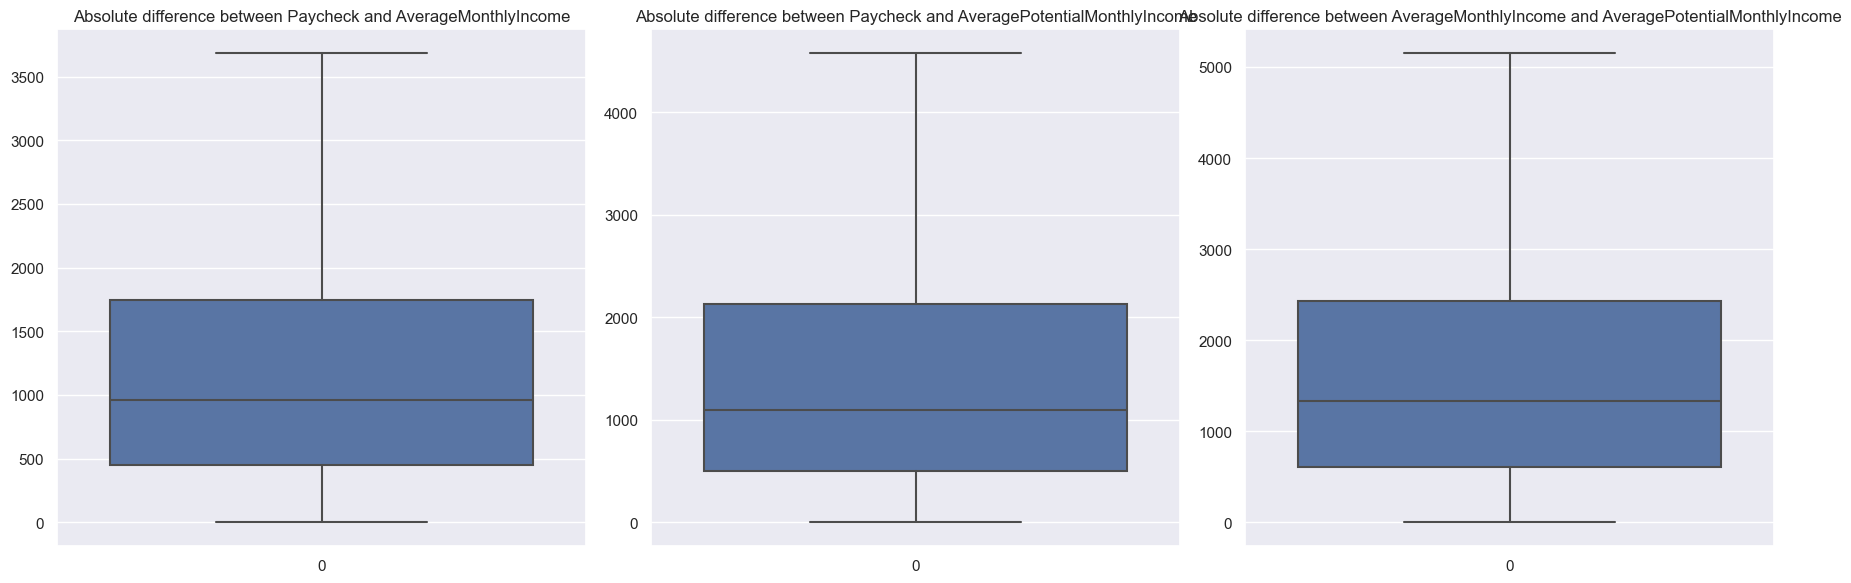

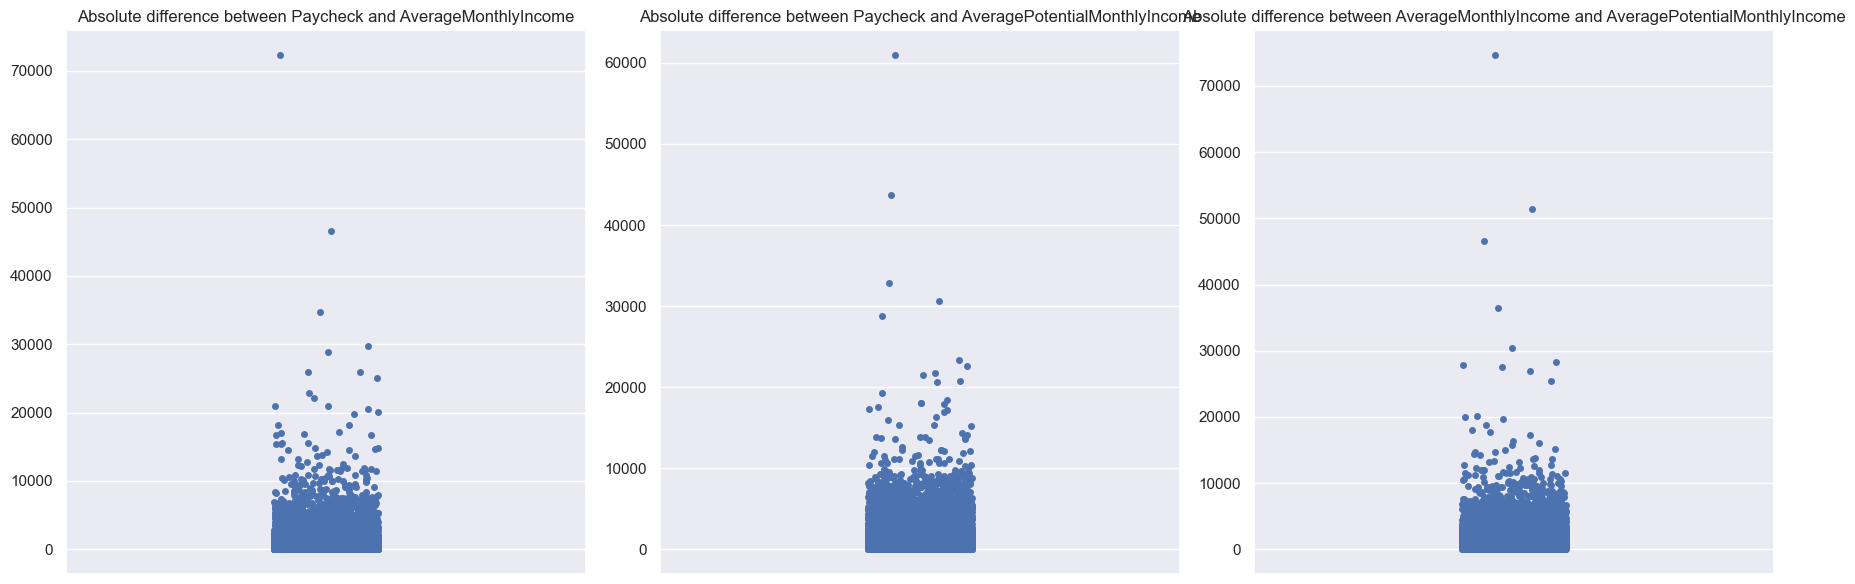

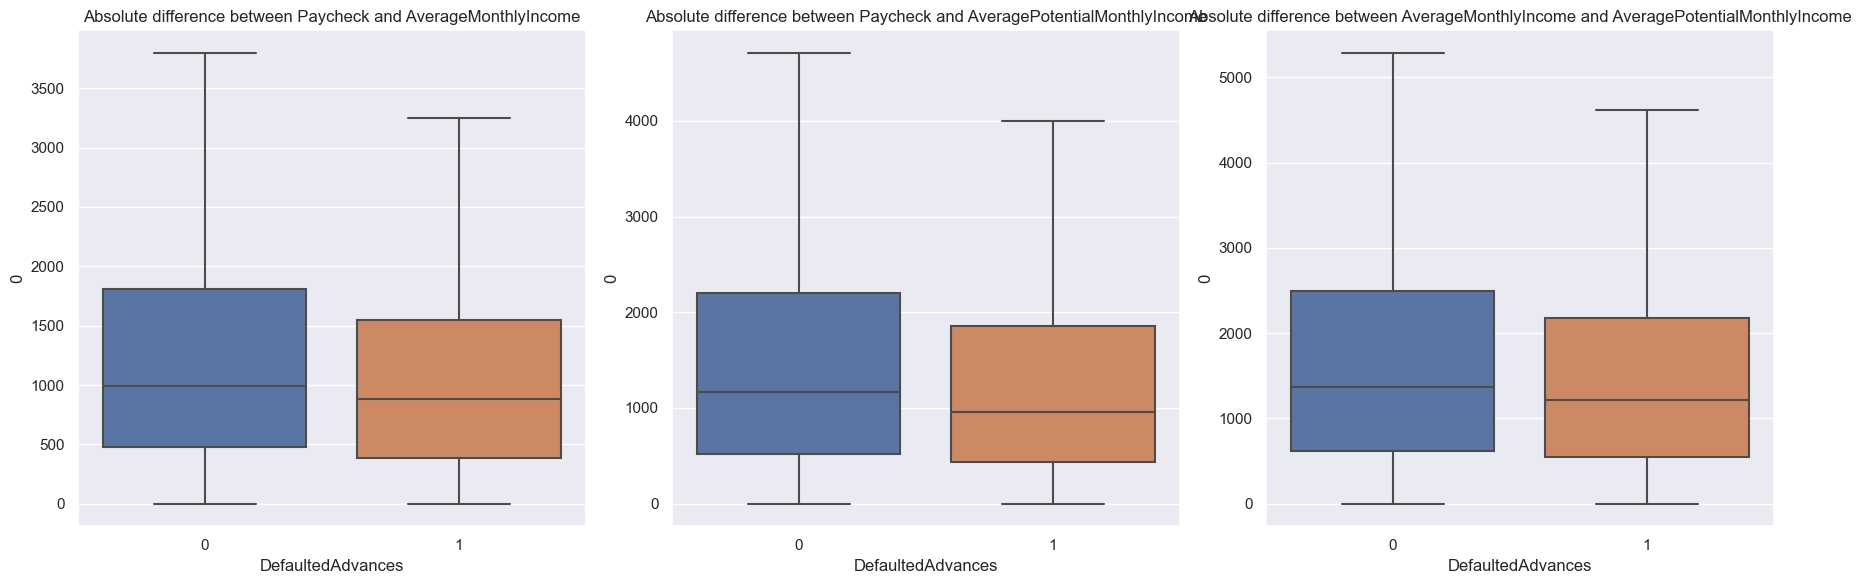

In [120]:
cols = ['Paycheck', 'AverageMonthlyIncome', 'AveragePotentialMonthlyIncome']
visualize_difference(cols)

How different are the 2 late fees columns: LatefeesTotalCount, LatefeesCount?


,LatefeesTotalCount,LatefeesCount
count,11808.000000,11808.000000
mean,0.116192,0.021257
std,1.049410,0.199870
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,34.000000,5.000000


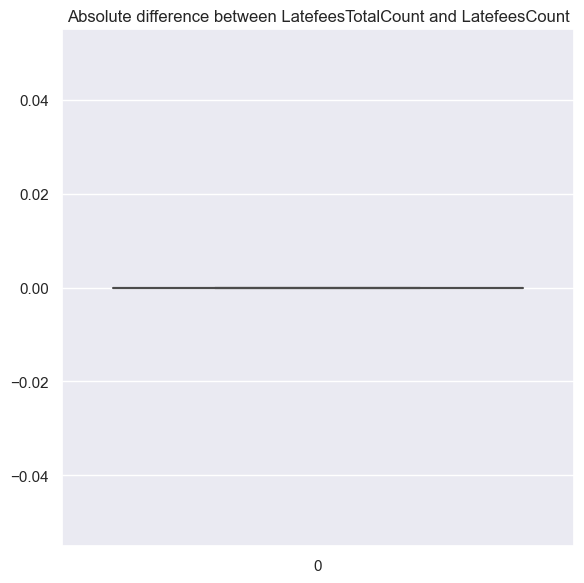

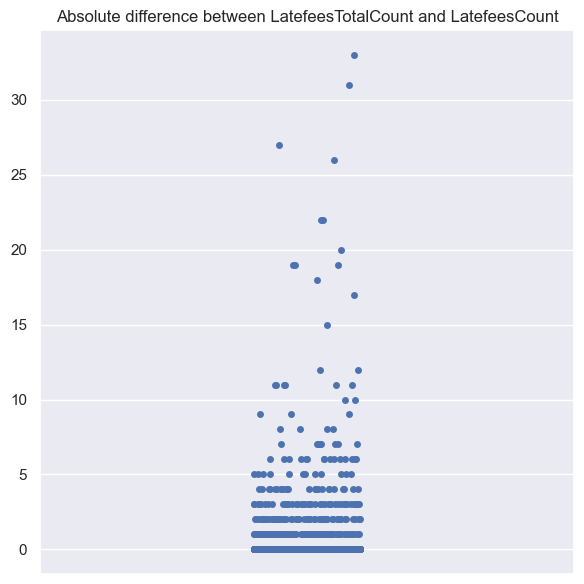

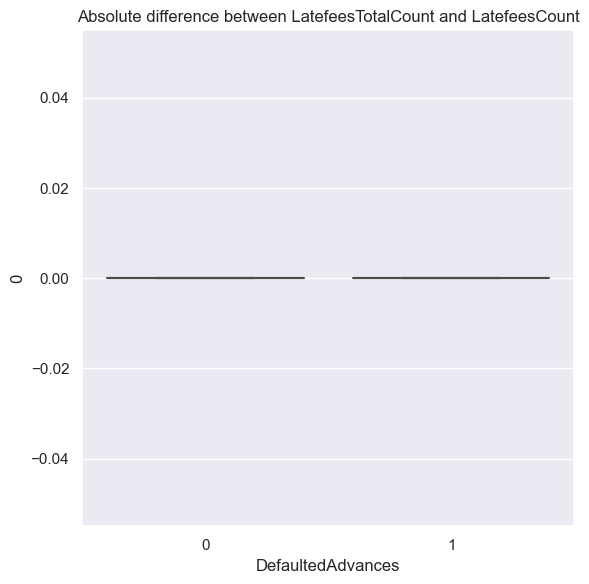

In [121]:
cols = ['LatefeesTotalCount', 'LatefeesCount', ]
visualize_difference(cols)

In [123]:
df.loc[df['LatefeesTotalCount'] == df['LatefeesCount']].shape[0]/df.shape[0]

0.9748475609756098

How different are the 2 transaction columns: AverageNumberOfTransactionsADay, AverageNumberOfTransactionsADayPrimaryChecking?


,AverageNumberOfTransactionsADay,AverageNumberOfTransactionsADayPrimaryChecking
count,11808.000000,11808.000000
mean,3.422773,3.161636
std,1.811319,1.523624
min,0.100987,0.303867
25%,2.177242,2.105988
50%,3.118911,2.939220
75%,4.285658,3.956224
max,18.046358,18.046358


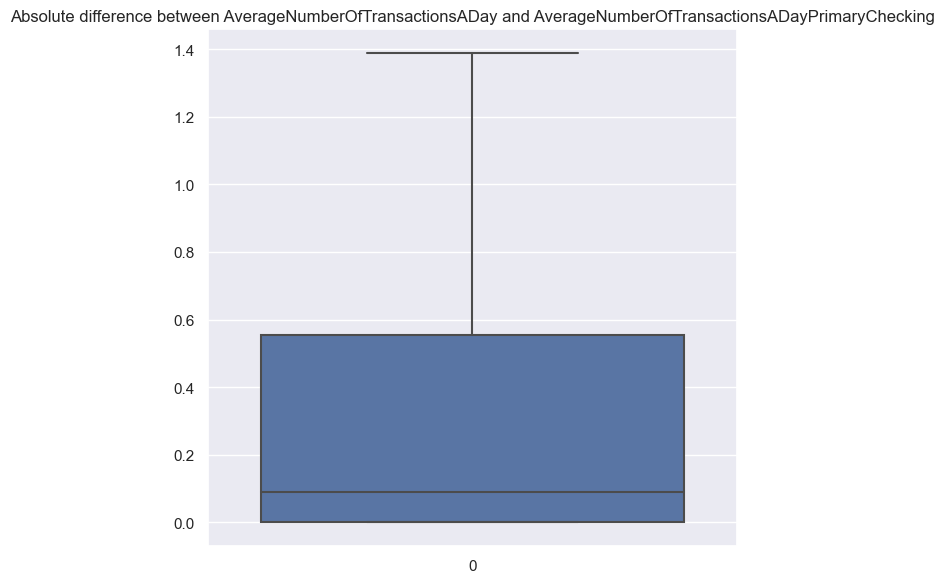

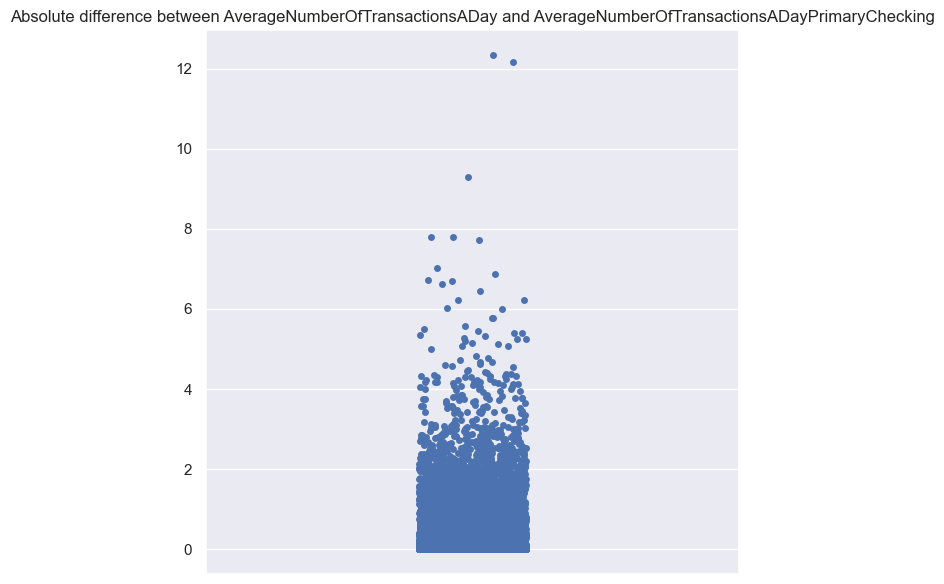

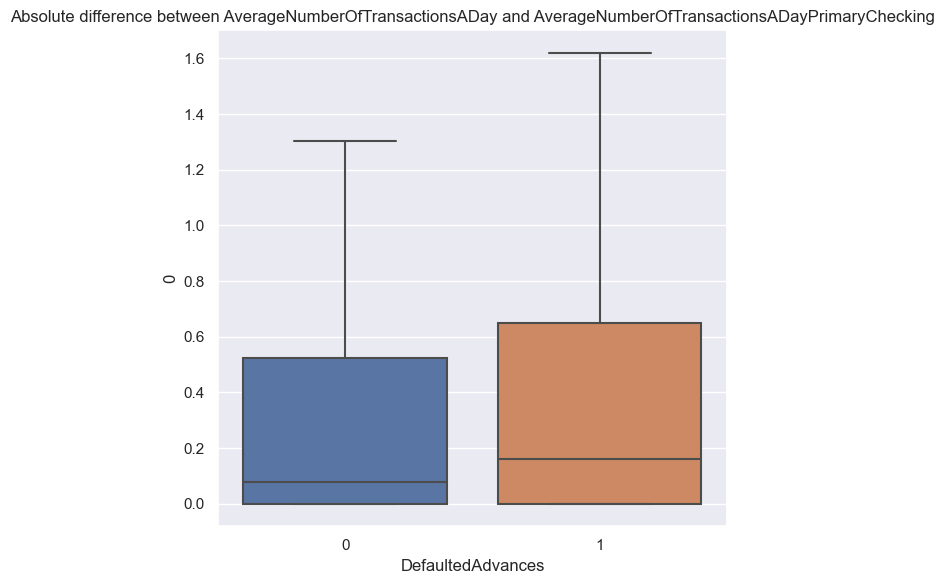

In [163]:
cols = ['AverageNumberOfTransactionsADay', 'AverageNumberOfTransactionsADayPrimaryChecking', ]
visualize_difference(cols)

## Detailed Exploration

### Categorical Variables

The only categorical variable pertains to the ML model used to identify paychecks

In [124]:
cat_columns

['PaycheckModelUsed']

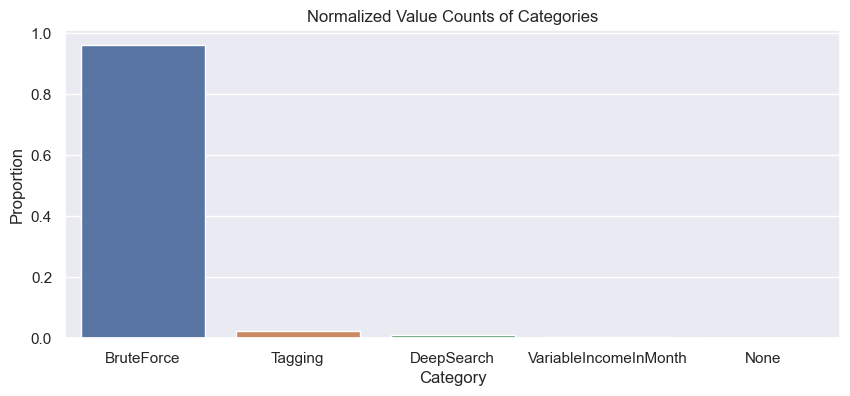

In [151]:
vc = df[cat_columns].value_counts(normalize=True, dropna=False)

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=[x[0] for x in vc.index.tolist()], y=vc.values, ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Normalized Value Counts of Categories')
plt.show()

Since a lot of the null values are in columns related to the ML model, I wanted to see if any particular model led to more Nulls than others

In [134]:
pd.concat([df[cat_columns].value_counts(normalize=True, dropna=False), df[cat_columns].value_counts(normalize=False, dropna=False)], axis=1)

,0,1
PaycheckModelUsed,,
BruteForce,0.962483,11365
Tagging,0.022358,264
DeepSearch,0.011687,138
VariableIncomeInMonth,0.003388,40
None,0.000085,1


Alternatively, we can also look at the proportion of the ML columns that have null values

In [139]:
pd.concat(
    [
        df.assign(flag=np.where(df['ErrorRate'].isna(), 1, 0)).groupby(cat_columns)['flag'].value_counts(dropna=False, normalize=False),
        df.assign(flag=np.where(df['ErrorRate'].isna(), 1, 0)).groupby(cat_columns)['flag'].value_counts(dropna=False, normalize=True)],
    axis=1)


flag      flag
PaycheckModelUsed     flag                 
BruteForce            0     11312  0.995337
                      1        53  0.004663
DeepSearch            1        98  0.710145
                      0        40  0.289855
None                  1         1  1.000000
Tagging               0       135  0.511364
                      1       129  0.488636
VariableIncomeInMonth 0        36  0.900000
                      1         4  0.100000

## Floats

Text(0.5, 1.0, 'Normalized Value Counts of Categories')

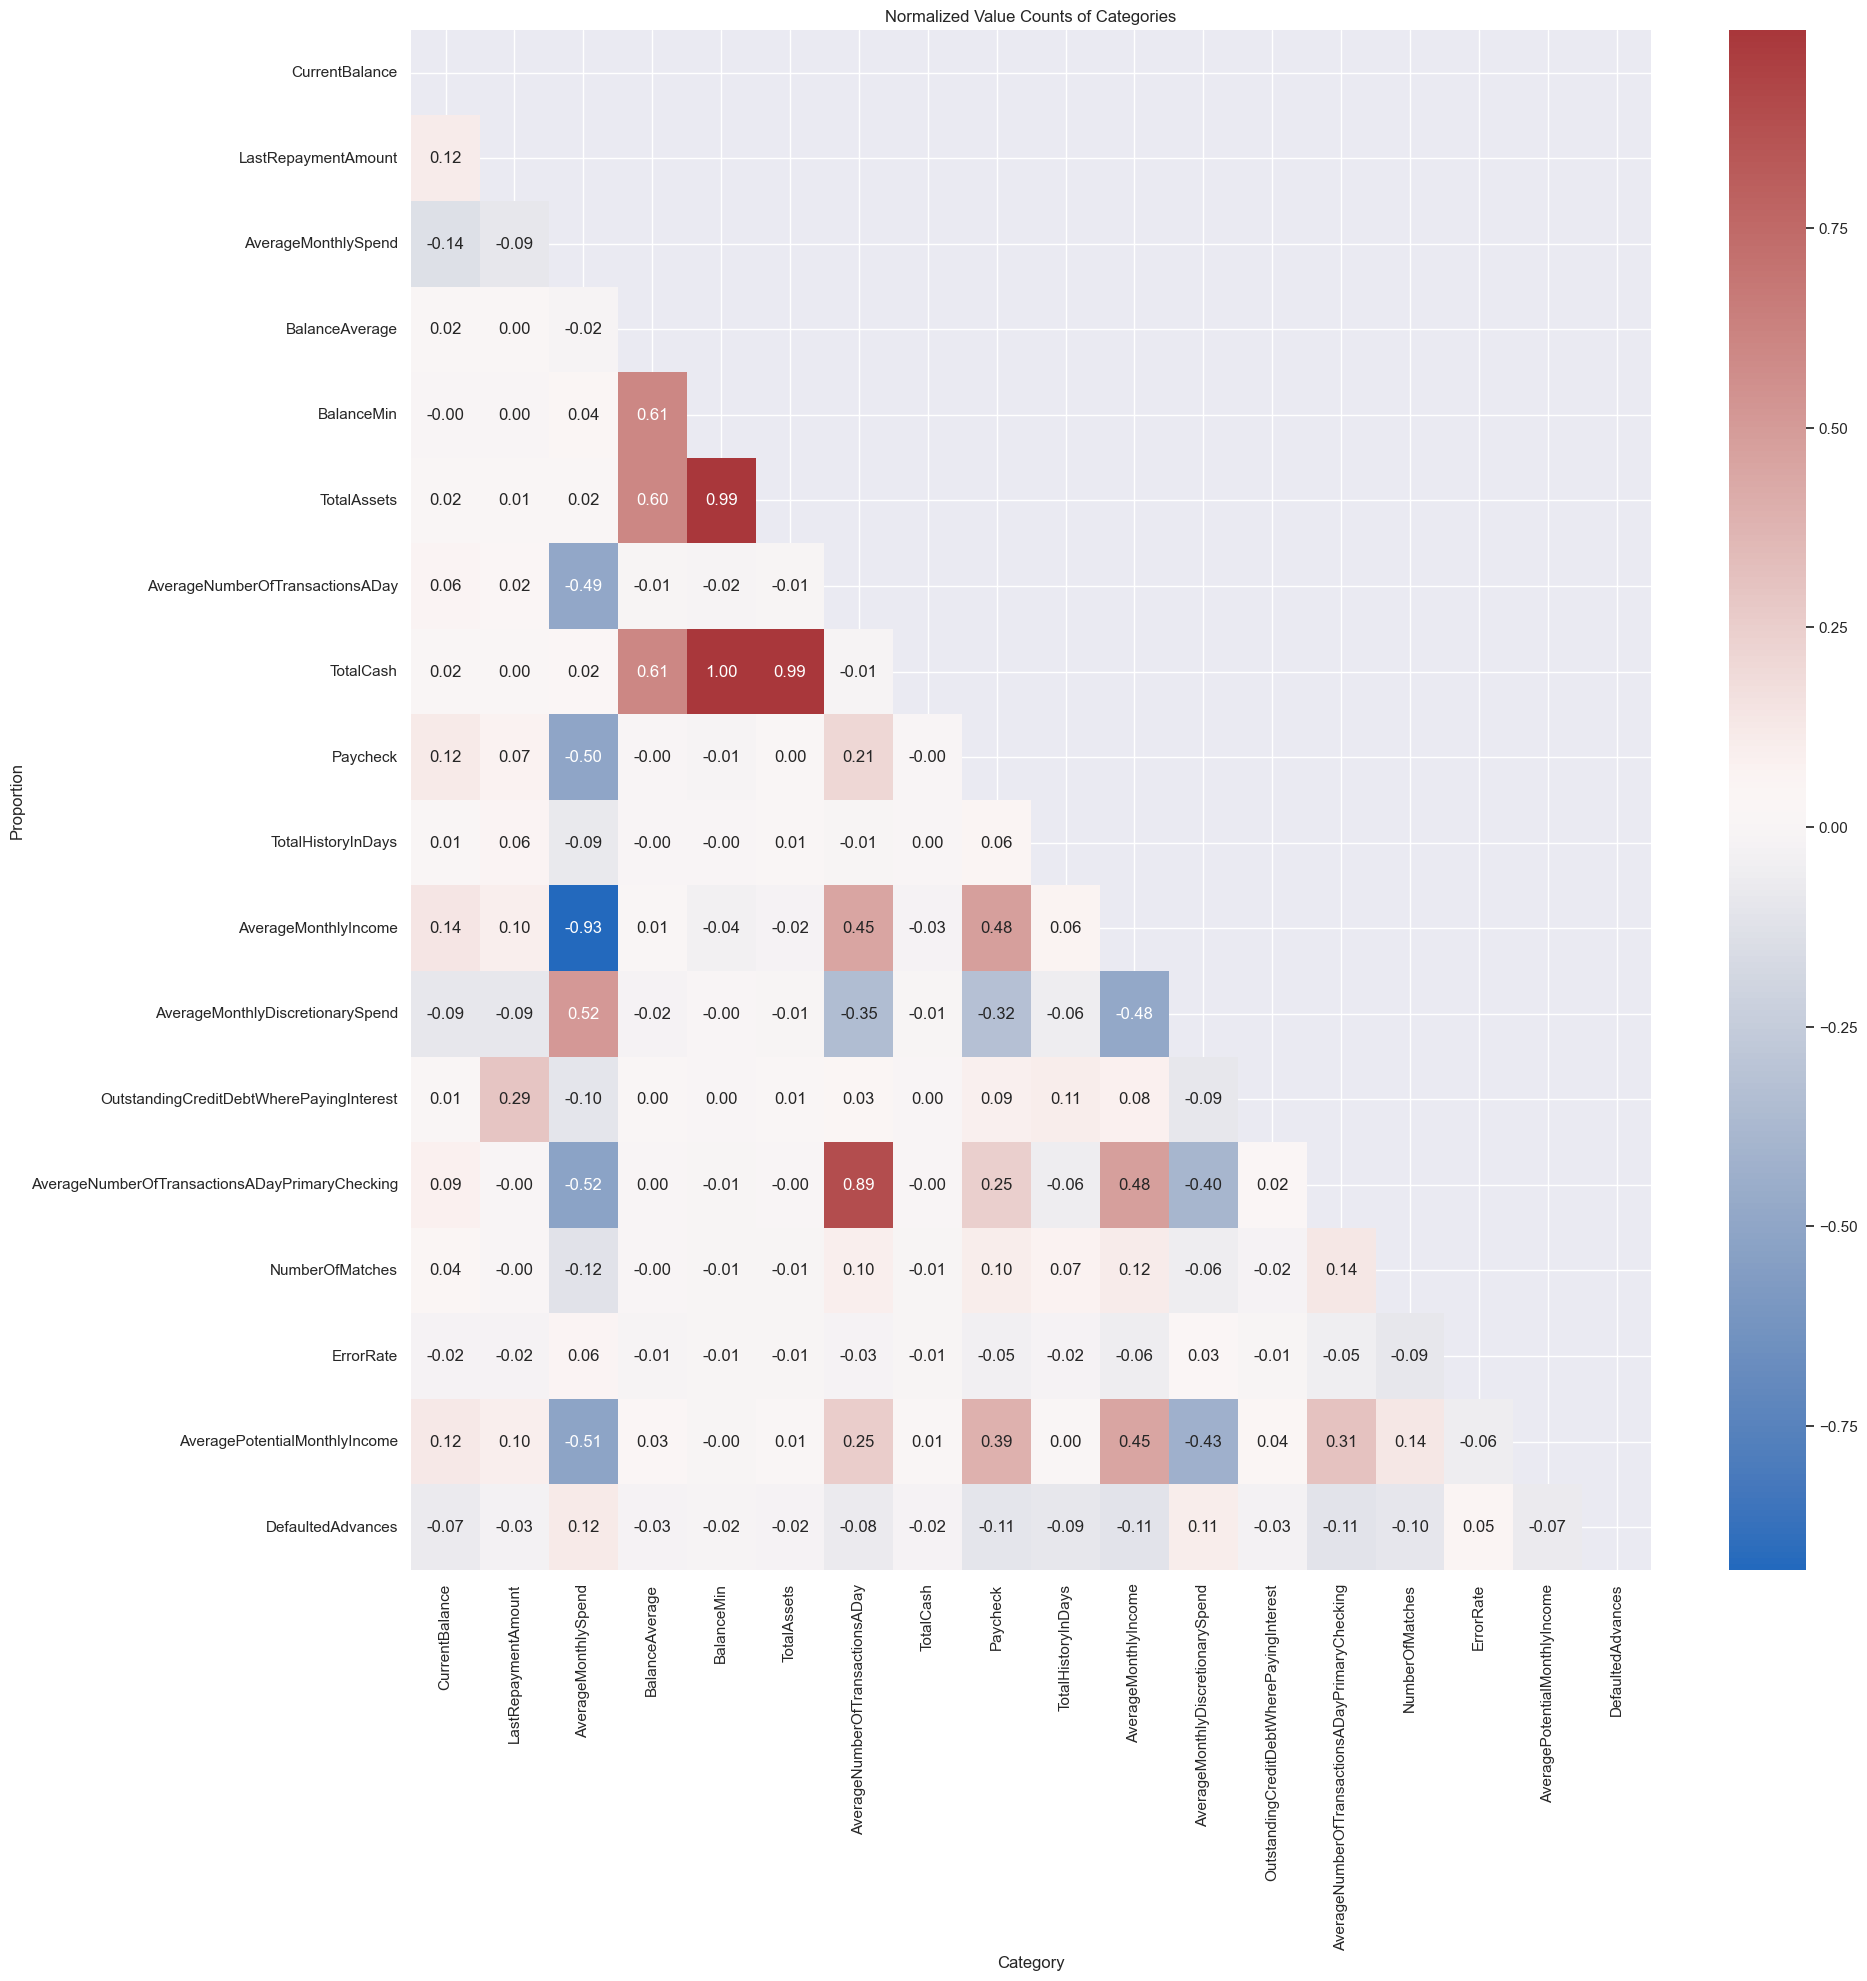

In [162]:
corr= df[float_columns+[target_var]].corr()
matrix = np.triu(corr)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=matrix, fmt='.2f', cmap='vlag')
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Normalized Value Counts of Categories')